In [40]:
#Phase-1:Business Understanding
#We want to analyze the relationships between different parameters like Beds_per_million,Tests_per_million,population on the basis of States/UT.
#By doing so,we want to crunch out some interesting patterns that we don't see in media or news channels.
#This would also help local authorities and administration to curb the spread of novel corona virus.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#importing libraries


In [42]:
#Phase-2:Data Understanding
#In this phase,we collect data,see its information,describe it and finally load the dataset

In [43]:
df_beds=pd.read_csv('HospitalBedsIndia.csv') #Hospital Beds dataset
df_beds.info()
df_beds.describe()

df_population=pd.read_csv('population_india_census2011.csv') #India's Population dataset
df_population.info()
df_population.describe()

df_testing=pd.read_csv('StatewiseTestingDetails.csv') #India's Testing dataset
df_testing.info()
df_testing.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               35 non-null     int64  
 1   State/UT                          35 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      35 non-null     int64  
 3   NumCommunityHealthCenters_HMIS    35 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      29 non-null     float64
 5   NumDistrictHospitals_HMIS         35 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  35 non-null     int64  
 7   NumPublicBeds_HMIS                35 non-null     int64  
 8   NumRuralHospitals_NHP18           35 non-null     int64  
 9   NumRuralBeds_NHP18                35 non-null     int64  
 10  NumUrbanHospitals_NHP18           35 non-null     int64  
 11  NumUrbanBeds_NHP18                35 non-null     int64  
dtypes: float64

,Tested,Confirmed,Recovered,Deaths,Active
count,27.000000,35.000000,35.000000,35.000000,35.000000
mean,12546.222222,469.371429,75.828571,15.371429,378.171429
std,13924.766410,868.256776,122.205344,40.102139,726.397091
min,274.000000,0.000000,0.000000,0.000000,0.000000
25%,2411.500000,4.500000,1.000000,0.000000,1.000000
50%,6438.000000,41.000000,17.000000,1.000000,33.000000
75%,20266.500000,395.500000,104.500000,15.500000,278.000000
max,55678.000000,4200.000000,507.000000,223.000000,3470.000000


In [44]:
#Phase-3:Data Preparation
#In this phase,we select suitable data which is of use,modify data,clean data and handle missing values.

In [45]:
df_beds.drop('Sno', axis=1, inplace=True) #Drop unnecessary column
df_beds.isna().sum() 
#We have 6 missing values in NumDistrictHospitals_HMIS column.Since we have only 35 rows,it wouldn't be wise to drop these rows.
#Also,it won't be a good decision to fill these with mean,median or mode values.Therefore,we interpolate these missing values through column interpolation.

df_beds[df_beds.columns[1:]]=(df_beds[df_beds.columns[1:]].interpolate(method='linear',limit_direction='backward',axis=1)).astype(int) #Predicting missing values of hospital beds values through interpolation

df_beds['Total_Hospital_Beds']=df_beds[df_beds.columns[1:]].sum(axis=1)  #Sum of no. of beds in all the columns
df_beds.head()

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Hospital_Beds
0,Andaman and Nicobar Islands,27,4,3,3,34,1246,27,575,3,500,2422
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658,87527
2,Arunachal Pradesh,122,62,38,15,199,2320,208,2136,10,268,5378
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198,39923
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936,35140


In [46]:
df_population.drop('Sno', axis=1, inplace=True) #Drop unnecessary column
df_population.isna().sum() #We have no missing values in this dataframe

df_population.rename(columns = {'State / Union Territory':'State/UT'},inplace=True)  #Renaming common column to merge dataframes

df_population.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918


In [47]:
df_final=pd.merge(df_population,df_beds, on='State/UT') #Merge population and beds dataset
df_final['Beds_per_million']=(df_final['Total_Hospital_Beds']/(df_final['Population']/1000000)).astype(int) #Calculating no. of beds per million people

df_final.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Hospital_Beds,Beds_per_million
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,27,4,3,3,34,1246,27,575,3,500,2422,6363
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,1417,198,31,20,1666,60799,193,6480,65,16658,87527,1765
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938,122,62,38,15,199,2320,208,2136,10,268,5378,3886
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954,1007,166,14,33,1220,19115,1176,10944,50,6198,39923,1279
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,2007,63,33,43,2146,17796,930,6083,103,5936,35140,337


In [48]:
df_testing.rename(columns = {'State':'State/UT'},inplace=True) #Renaming common column to merge dataframes
df_testing.isna().sum() #We have 8 missing values in Tested column.Since states with 0 people tested aren't useful for our analysis
#Therfore,we drop these rows
df_testing.dropna(subset=['Tested'],how='any',axis=0,inplace=True) #Drop rows having NaN in Tested column

df_final=pd.merge(df_final,df_testing, on='State/UT') #Merge testing dataset with final dataset
df_final['Tested']=df_final['Tested'].astype(int) #Coverting values to integer

df_final.isna().sum()#No missing values in our final dataset
df_final.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,...,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_Hospital_Beds,Beds_per_million,Tested,Confirmed,Recovered,Deaths,Active
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,27,4,3,...,575,3,500,2422,6363,1403,15,11,0,4
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,1417,198,31,...,6480,65,16658,87527,1765,20235,647,65,17,565
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938,122,62,38,...,2136,10,268,5378,3886,363,1,1,0,0
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954,1007,166,14,...,10944,50,6198,39923,1279,4236,35,17,1,17
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,2007,63,33,...,6083,103,5936,35140,337,9486,96,42,2,52


In [49]:
df_final['Tests_per_million']=(df_final['Tested']/df_final['Population'])*1000000 #Calculating Tests per million
df_final['Death_Percent']=(df_final['Deaths']/df_final['Confirmed'])*100 #Calculating Death Percentage
df_final['Recovery_Percent']=(df_final['Recovered']/df_final['Confirmed'])*100 #Calculating Recovery Percentage
df_final['Confirmation_Percent']=(df_final['Confirmed']/df_final['Tested'])*100 #Calculating Confirmation Percentage

df_final.fillna(0,inplace=True)

df_final['Tests_per_million']=df_final['Tests_per_million'].round() #Rounding Tests per million
df_final['Death_Percent']=df_final['Death_Percent'].round() #Rounding Death Percentage
df_final['Recovery_Percent']=df_final['Recovery_Percent'].round() #Rounding Recovery Percentage
df_final['Confirmation_Percent']=df_final['Confirmation_Percent'].round() #Rounding Confirmation Percentage

df_final.head()

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,...,Beds_per_million,Tested,Confirmed,Recovered,Deaths,Active,Tests_per_million,Death_Percent,Recovery_Percent,Confirmation_Percent
0,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,27,4,3,...,6363,1403,15,11,0,4,3686.0,0.0,73.0,1.0
1,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,1417,198,31,...,1765,20235,647,65,17,565,408.0,3.0,10.0,3.0
2,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938,122,62,38,...,3886,363,1,1,0,0,262.0,0.0,100.0,0.0
3,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954,1007,166,14,...,1279,4236,35,17,1,17,136.0,3.0,49.0,1.0
4,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,2007,63,33,...,337,9486,96,42,2,52,91.0,2.0,44.0,1.0


In [50]:
#Phase-4:Modelling
#In this phase,we visualize the data,and generate the models by selecting appropriate modelling technique. 

In [51]:
def plot_chart(comparison_basis,param1,param2,row_start,row_end,ascend,sort_by,chart_type,width1,width2):
    """
    Plots a dual category comparison chart 
    
    Args:
      comparison_basis:Common basis on which the parameters are compared
      param1:First comparison parameter
      param2:Second comparison parameter
      row_start:Row start index from where we want to plot data
      row_end:Row end index + 1 till where we want to plot data
      ascend:True for ascending order,False for descending order
      sort_by:Parameter on the basis of which data is to be sorted
      chart_type:'bar' for Bar,'barh' for Horizontal Bar,'scatter' for Scatter plot
      width1:width of data point of param1
      width2:width of data point of param2
      
      Return:
          None
    """
    conditions = {
    'bar': plt.bar,
    'barh': plt.barh,
    'scatter': plt.scatter,
    }   #conditions for selecting pltting function
    
    df=pd.DataFrame(data={comparison_basis:df_final[comparison_basis],param1:df_final[param1],param2:df_final[param2]}) #Creating a new datframe 

    df=df.sort_values(by=sort_by,ascending=ascend) #Sorting dataframe on the basis of given parameter in specified order
    df=df.iloc[row_start:row_end,:] #Selecting rows

    plt.figure(figsize=(18,12)) #Adjusting size of figure

    plt.title(comparison_basis + ' wise comparison of '+ param1 + ' and ' + param2,fontsize=15) #Title of plot
    
    p1=conditions[chart_type](df[comparison_basis],df[param1],width1) #Plotting graph
    p2=conditions[chart_type](df[comparison_basis],df[param2],width2) #Plotting graph

    plt.xticks(fontsize=12, rotation='vertical') #Adjusting size and orientation of xticks
    plt.yticks(fontsize=12) #Adjusting size of yticks

    plt.legend((p1,p2), (param1,param2),fontsize=12) #Marking legends on plot

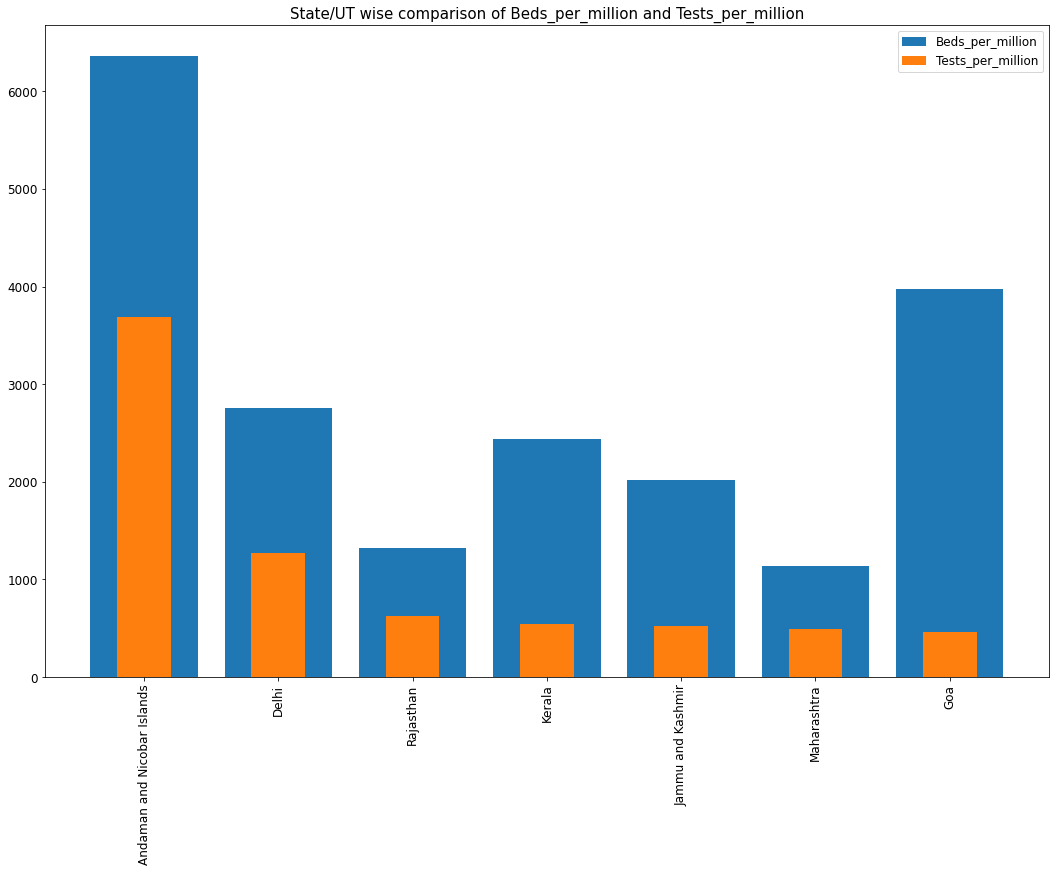

In [52]:
#Q1.Relationship between beds available and tests conducted per million people for top 7 states in the decreasing order of tests conducted?
#Is our medical preparedness upto the mark?
#Can we conduct more tests?
#Do we have enough beds to handle future cases?

plot_chart('State/UT','Beds_per_million','Tests_per_million',0,7,False,'Tests_per_million','bar',0.8,0.4)


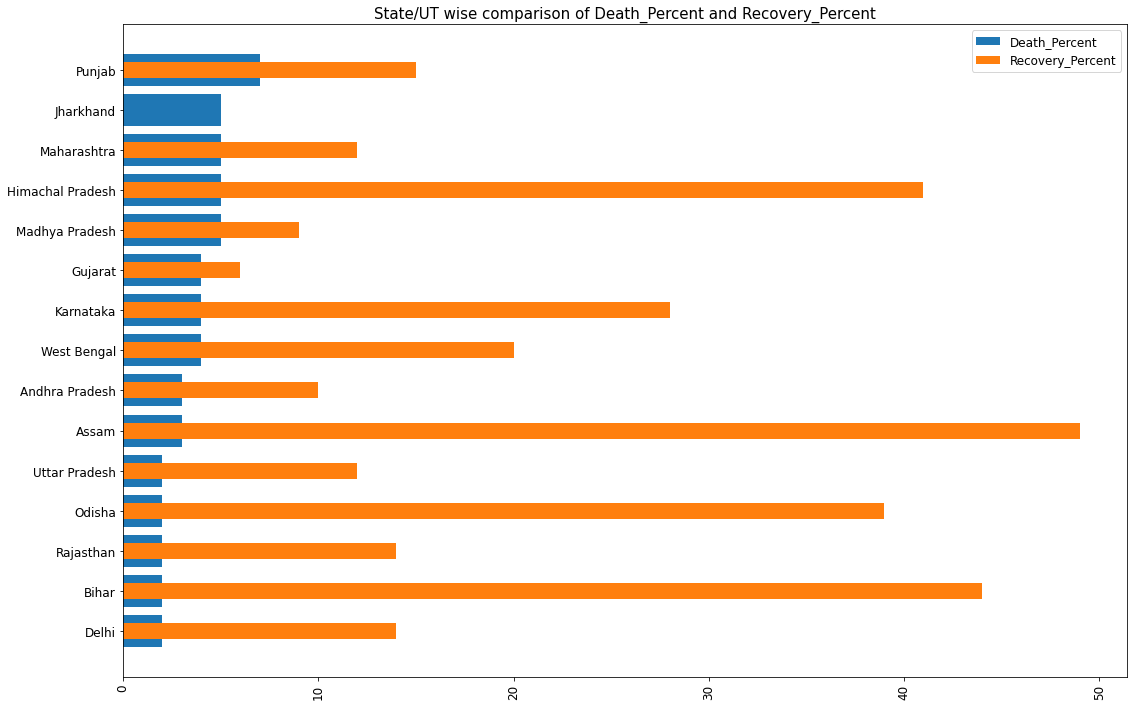

In [53]:
#Q1.Relationship between Death Percent and Recovery Percent for top 15 states in terms of Death Percentage?
#Is no. of beds only criteria for evaluating the medical facilities of a state?
#Does low mortality rate automatically corresponds to high recovery rate?

plot_chart('State/UT','Death_Percent','Recovery_Percent',12,27,True,'Death_Percent','barh',0.8,0.4)

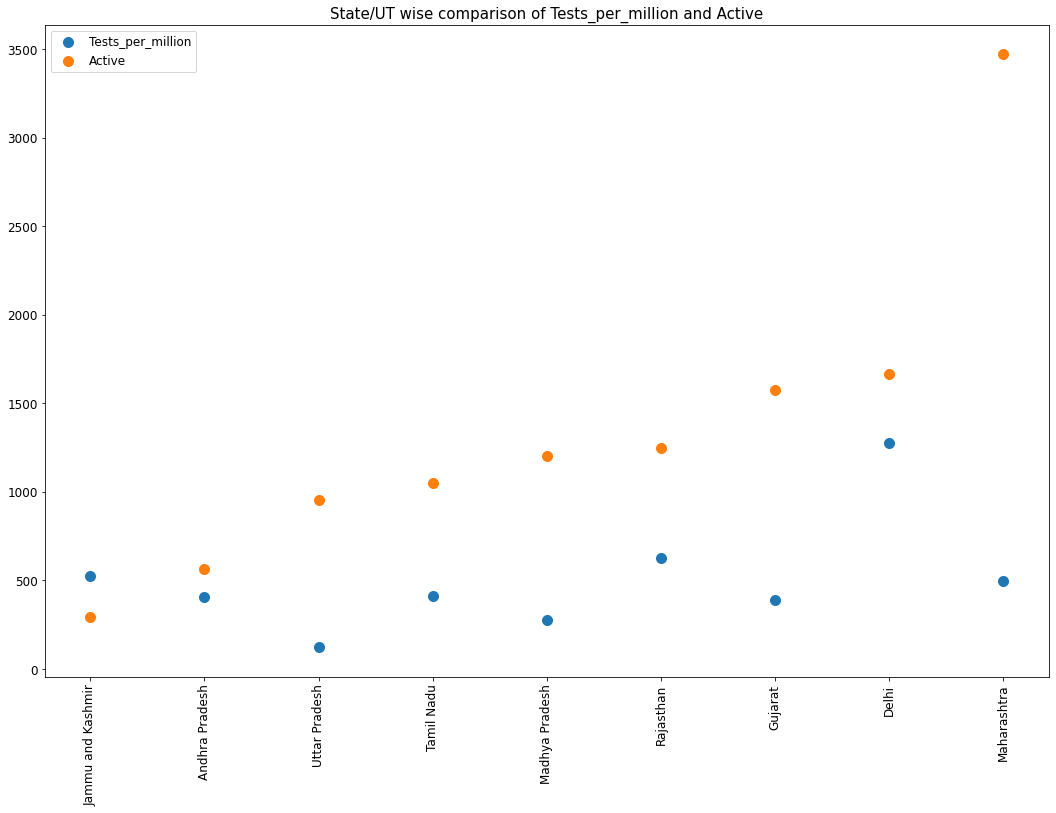

In [54]:
#Q1.Relationship between active cases and tests conducted per million people for top 9 states in terms of active cases?
#Does testing and active cases have a relationship between them?
#Are we conducting enough tests to trace people?
#How can we reduce the active cases through testing?

plot_chart('State/UT','Tests_per_million','Active',18,27,True,'Active','scatter',100,100)

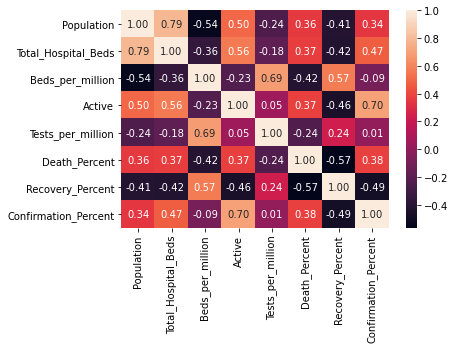

In [55]:
df=df_final.iloc[:,[1,17,18,23,24,25,26,27]] #Selecting important columns 
sns.heatmap(df.corr(),annot=True, fmt=".2f") #Displaying correlation between columns

In [56]:
#Predicting no. of hospital beds that will be required in future
X=df_final[['Confirmation_Percent','Active','Population']] #Selecting independent columns having good correlation with Total_Hospital_Beds
X.isna().sum()
#This dataframe doesn't contain any missing values or categorical variables.So,we don't need to create any dummy variables

y=df_final['Total_Hospital_Beds'] #Dependent column
y.isna().sum()
#This dataframe doesn't contain any missing values or categorical variables.So,we don't need to create any dummy variables

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #Splitting into training and testing set

l=LinearRegression() #Instantiating Linear Regression

l.fit(X_train,y_train) #Fitting data



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#Phase-5:Evaluation
#In this last phase of CRISP-DM process we finally evaluate our results that we have generated using the above tasks 
#It answers our business objectives and we can verify our results to see if it meets our expectations

In [58]:
y_pred=l.predict(X_test) #Predicting data

r=r2_score(y_test,y_pred) #Checking the obtained results with actual result

r #We have obtained a fair enough value which indicates our model can be used

0.73228904934399